In [32]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import digamma
plt.style.use("seaborn-v0_8") # beautiful!

In [33]:
def coupon_collecting(N):
    occur = [0] * N      # 紀錄每一種分別拿到幾次。
    count = 0            # 紀錄已獲得幾種。
    steps = 0            # 紀錄抽獎次數。
    while count < N:
        steps += 1
        i = np.random.randint(N) # 產生 0 到 N-1 之間的均勻隨機整數。
        occur[i] += 1
        count += (1 if occur[i] == 1 else 0)
        
    return steps

In [30]:
max_N = 200
xs = np.array(range(1, max_N + 1))
ys = []
for N in xs:
    retry = 50
    data = [coupon_collecting(N) for _ in range(retry)]
    ys.append(np.mean(data))

# 跟答案做比較：我們繪製 n*Hn
hn = np.array([digamma(s+1) for s in xs]) + np.euler_gamma
zs = np.multiply(xs, hn)

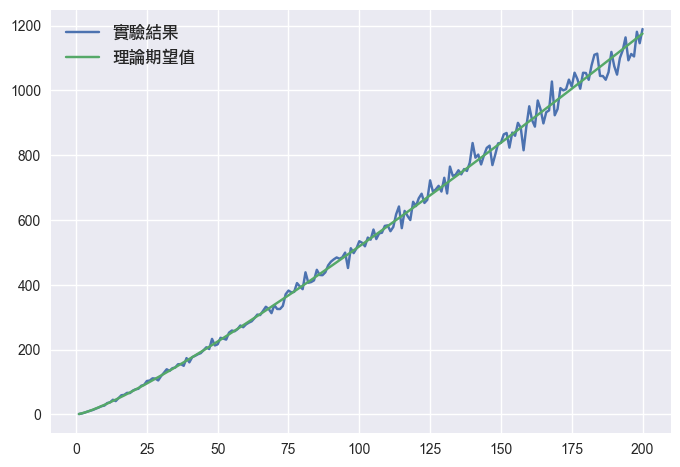

In [34]:
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family=['Arial', 'LiHei Pro'],
                                   style='normal', size=12)

plt.plot(xs, ys, label='實驗結果')
plt.plot(xs, zs, label='理論期望值')
plt.legend(loc='upper left', prop=font)
plt.show()